# Block 1

In [140]:
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
y = diabetes.target

# Block 2

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

# Block 3

In [142]:
def model_data(X,y):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1) 

  model = LinearRegression(fit_intercept=True) 
  model.fit(Xtrain,ytrain)
  
  print('Training R^2',model.score(Xtrain,ytrain))
  print('Testing R^2',model.score(Xtest,ytest))
  print('y = ',model.coef_[0],'*x + ',model.intercept_)

  y_model = model.predict(Xtest)

  fig,axes = plt.subplots(Xtrain.shape[1],1,figsize=[8,12])

  if Xtrain.shape[1] == 1:
    sns.scatterplot(x = Xtest[Xtest.columns[0]],y = ytest,ax=axes)
    sns.lineplot(x = Xtest[Xtest.columns[0]],y = y_model,ax=axes)
    return

# Block 4

Training R^2 0.049070238172854275
Testing R^2 -0.059028401121974605
y =  0.2251447529822975 *x +  0.002172752882771869


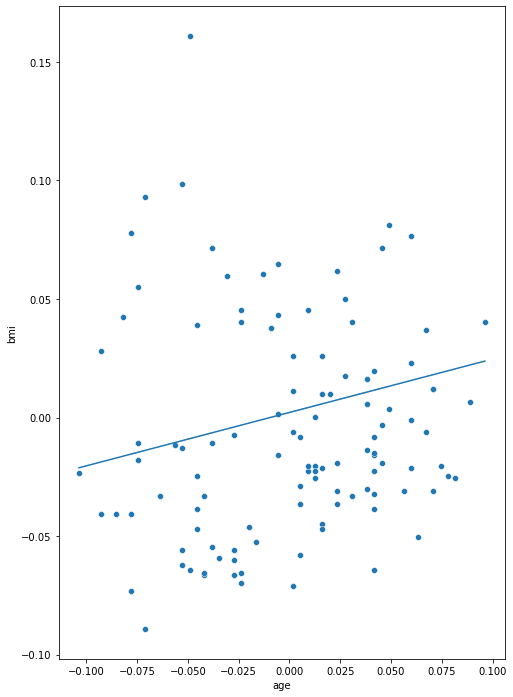

In [143]:
# Trying to see if the function works 
model_data(X[['age']],X['bmi'])

Training R^2 0.14122923482707161
Testing R^2 0.14771977532116876
y =  -0.3662999716569987 *x +  -0.00045766926314807935


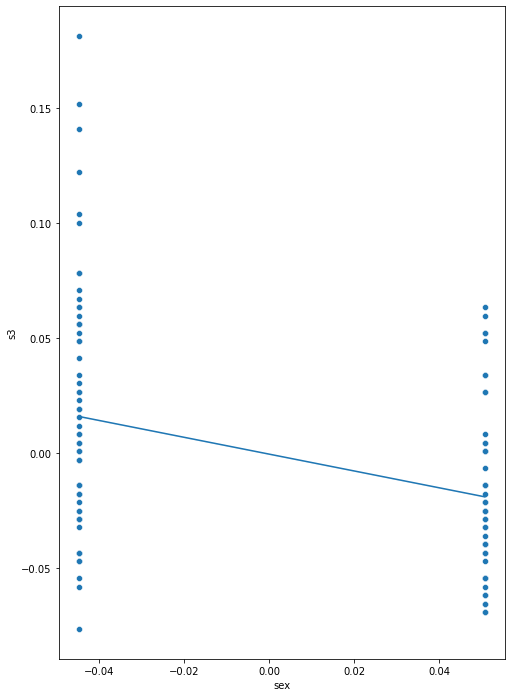

In [144]:
# Trying to see if the function works 
model_data(X[['sex']],X['s3'])

# Block 5

Training R^2 0.045384727639879774
Testing R^2 -0.011092244658333694
y =  352.7409414376732 *x +  153.6613607905345


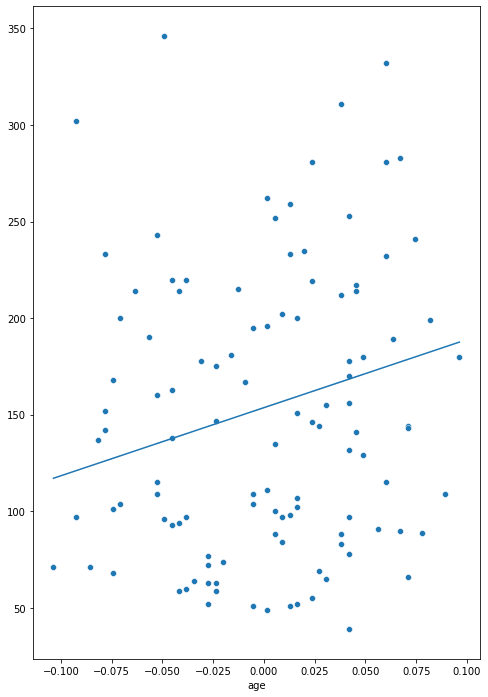

In [146]:
# Using the function to find the best single feature in X that best predicts y by trying out each column 
model_data(X[['age']],y)

Training R^2 0.38880250430560737
Testing R^2 0.17466209865339177
y =  1015.810698545722 *x +  151.45222563984663


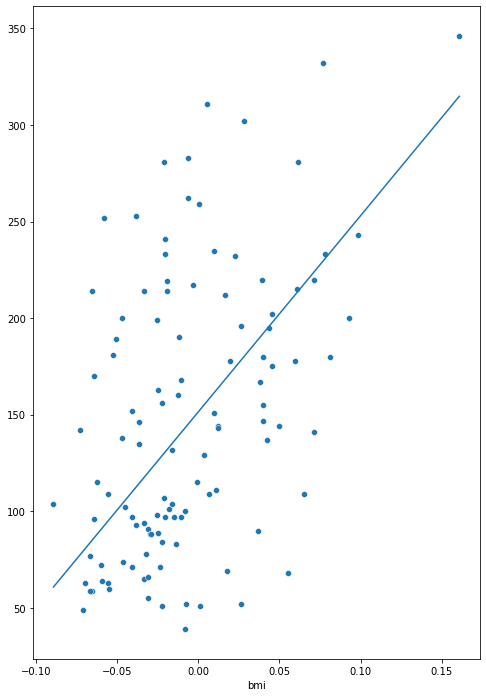

In [147]:
model_data(X[['bmi']],y)

Training R^2 0.1964839686305333
Testing R^2 0.18390082705313726
y =  741.1931107643638 *x +  151.99427556951179


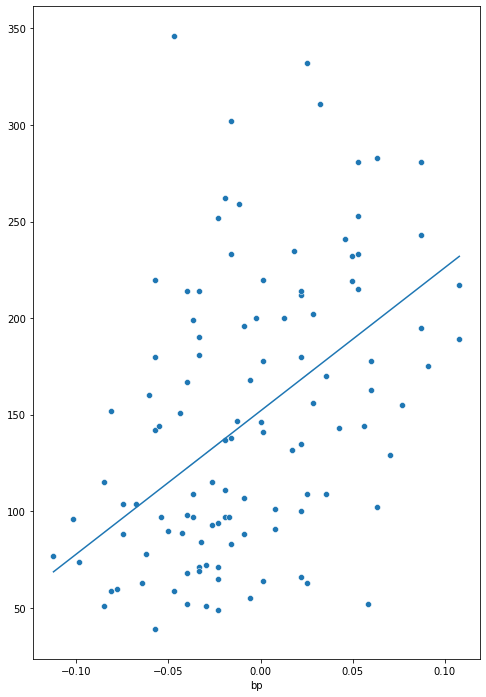

In [148]:
model_data(X[['bp']],y)

Training R^2 0.04168667199614595
Testing R^2 0.05003179316202577
y =  331.32978537310413 *x +  153.35316995849809


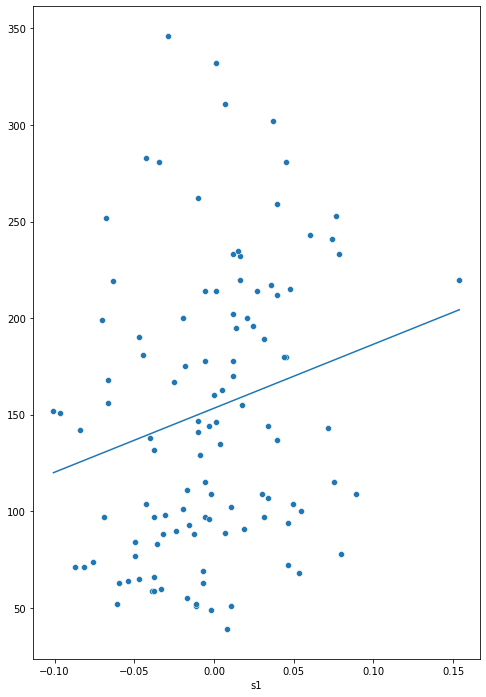

In [149]:
model_data(X[['s1']],y)

Training R^2 0.02470761499669738
Testing R^2 0.04248875852908429
y =  259.4048444454423 *x +  153.52804155555


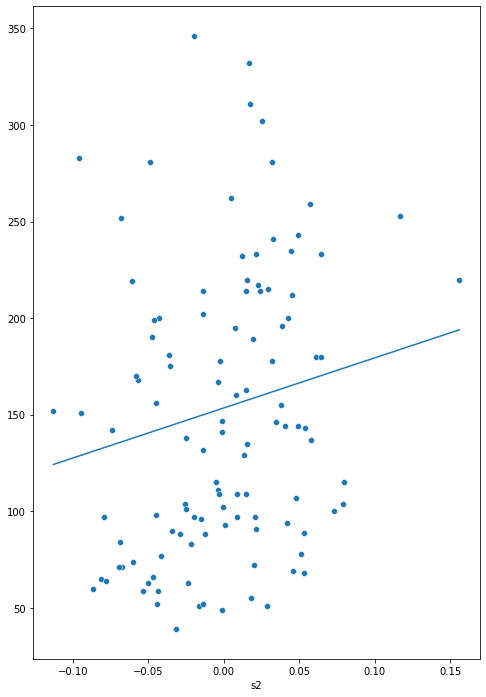

In [150]:
model_data(X[['s2']],y)

Training R^2 0.17017321772012173
Testing R^2 0.09411124480311595
y =  -698.0026781884103 *x +  153.26367030273306


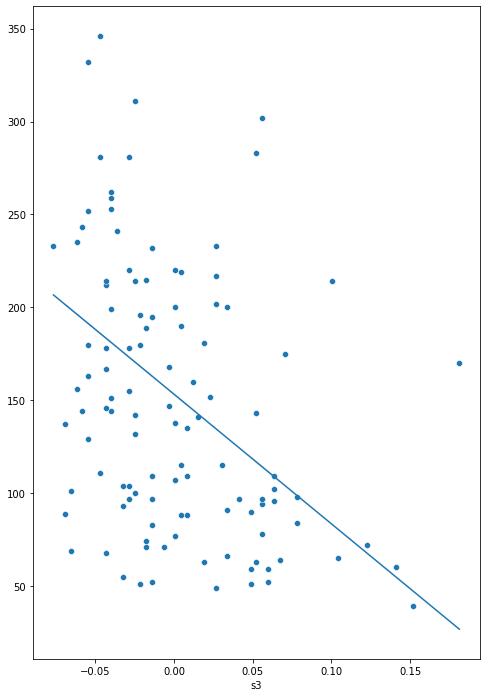

In [151]:
model_data(X[['s3']],y)

Training R^2 0.19338632561329683
Testing R^2 0.15094928794177753
y =  720.8862145681239 *x +  153.00239553680922


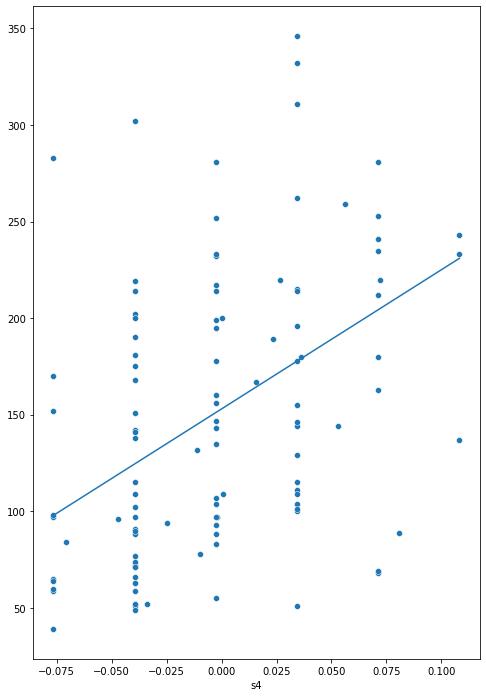

In [152]:
model_data(X[['s4']],y)

Training R^2 0.32597994540659747
Testing R^2 0.29630801377437443
y =  919.8022547764292 *x +  152.42842476411315


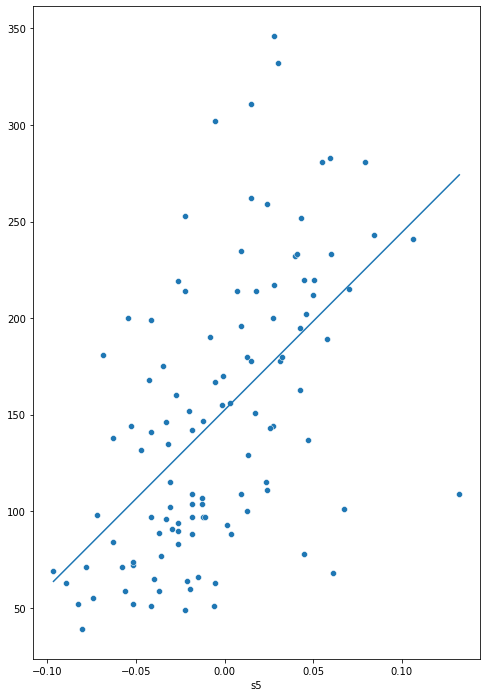

In [153]:
# Appears that this one produces the highest R^2 in terms of unbiased data (testing set)
# The s5 column in X is the one that best predicts y

model_data(X[['s5']],y) 

Training R^2 0.15228926762626183
Testing R^2 0.12046966383556679
y =  630.9188355178933 *x +  152.18012097208194


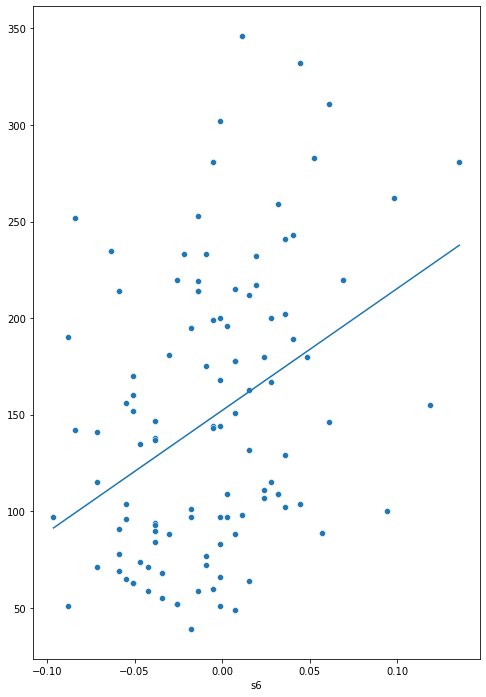

In [154]:
model_data(X[['s6']],y)

# Block 6 

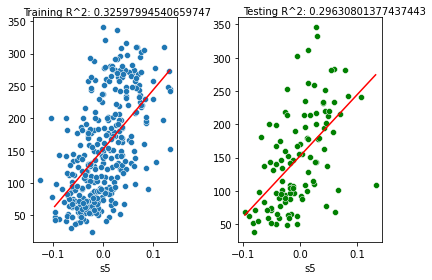

In [155]:
# Using code written from model_data function to create subplots

# Specifically using the column s5 because that was found to best predict y
Xtrain, Xtest, ytrain, ytest = train_test_split(X[['s5']],y,random_state=1)

model = LinearRegression(fit_intercept=True) 
model.fit(Xtrain,ytrain) 
Training_R = model.score(Xtrain,ytrain)
Testing_R = model.score(Xtest,ytest)
y_model = model.predict(Xtest)

# Creating the subplots
fig,axes = plt.subplots(nrows=1,ncols=2)
sns.scatterplot(x = Xtrain[Xtrain.columns[0]],y = ytrain,ax=axes[0])
sns.scatterplot(x = Xtest[Xtest.columns[0]],y = ytest,ax=axes[1],color='g')

# Include best fitting model line
sns.lineplot(x = Xtest[Xtest.columns[0]],y = y_model,ax=axes[0],color='r')
sns.lineplot(x = Xtest[Xtest.columns[0]],y = y_model,ax=axes[1],color='r')

# Adding R^2 value text
axes[0].text(-.16, 360, 'Training R^2: 0.32597994540659747')
axes[1].text(-.10, 365, 'Testing R^2: 0.29630801377437443')

plt.tight_layout()